# Introducción
En este notebook exploraremos cómo se generan números pseudoaleatorios y cómo, a partir de ellos, podemos generar variables aleatorias con diferentes distribuciones. Nos enfocaremos en el uso de generadores lineales congruenciales (GLC) para la generación de números uniformemente distribuidos y luego utilizaremos el método de la transformada inversa para obtener variables aleatorias con distribuciones como la exponencial y la gamma.


# Generador Lineal Congruencial (GLC)

El **Generador Lineal Congruencial (GLC)** es uno de los métodos más conocidos y utilizados para la generación de números pseudoaleatorios. El GLC se define mediante la siguiente relación de recurrencia:

$$
X_{n+1} = (aX_n + c) \, \text{mod} \, m
$$

Donde:
- $X_n$ es el $n$-ésimo número pseudoaleatorio generado.
- $a$ es el multiplicador.
- $c$ es el incremento.
- $m$ es el módulo, que define el rango de los valores generados.
- $X_0$ es la semilla o valor inicial.

### Importancia de los Parámetros
Cada uno de los parámetros del GLC juega un papel fundamental en la calidad de los números pseudoaleatorios generados:
- **Multiplicador $a$**: Debe elegirse con cuidado para garantizar que la secuencia de números tenga buenas propiedades estadísticas, como la independencia entre los valores generados.
- **Incremento $c$**: Permite añadir más variabilidad a la secuencia, evitando ciclos cortos. Para ciertos valores, $c = 0$ corresponde a un generador multiplicativo.
- **Módulo $m$**: Es el rango máximo de los valores generados. Habitualmente se elige $m$ como una potencia de dos para facilitar los cálculos computacionales. El tamaño de $m$ determina el período máximo del generador.
- **Semilla $X_0$**: Determina el punto inicial de la secuencia. Diferentes semillas generan secuencias diferentes, aunque con las mismas propiedades estadísticas.

### Ciclos y Periodo
Un GLC puede entrar en un ciclo donde los números generados se repiten después de cierto número de iteraciones. El **periodo** máximo de un GLC es igual a $m$, pero esto solo ocurre bajo ciertas condiciones:
1. $c$ y $m$ deben ser primos entre sí.
2. $a - 1$ debe ser divisible por todos los factores primos de $m$.
3. Si $m$ es divisible por 4, $a - 1$ debe ser divisible por 4.

### Importancia de las Variables Uniformes en la Simulación Estocástica
Las variables uniformes son fundamentales en la simulación estocástica ya que, mediante transformaciones como la **transformada inversa**, es posible generar variables aleatorias con diferentes distribuciones (exponencial, normal, gamma, entre otras). Dado que cualquier distribución puede ser obtenida a partir de una secuencia uniforme, un buen generador de números uniformes es esencial para obtener simulaciones fiables y precisas.

### Implementación del GLC en Python
A continuación, implementamos un GLC para generar números pseudoaleatorios uniformemente distribuidos en el intervalo [0, 1]. También generamos una gráfica de la trayectoria del GLC y un histograma horizontal de los valores generados.





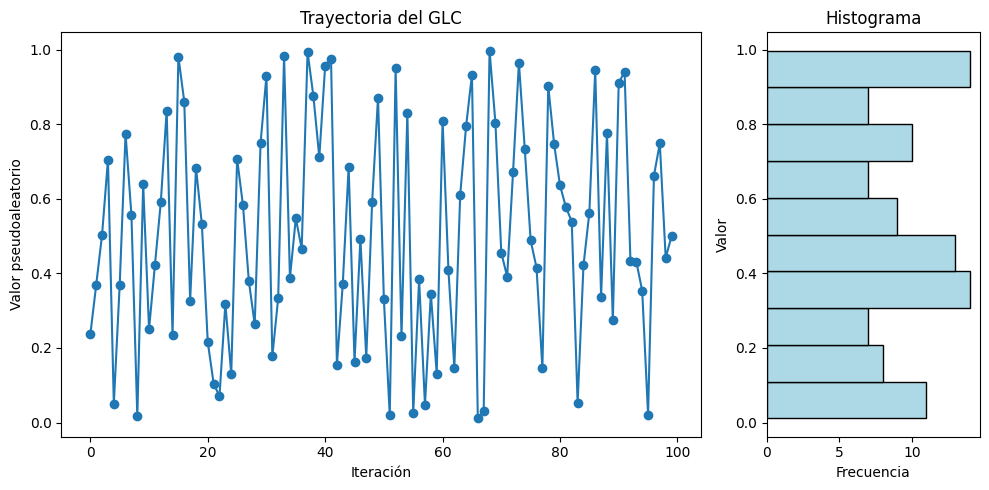

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Implementación del Generador Lineal Congruencial (GLC)
class GeneradorLinealCongruencial:
    def __init__(self, a, c, m, X0):
        self.a = a
        self.c = c
        self.m = m
        self.X = X0

    def generar_numero(self):
        self.X = (self.a * self.X + self.c) % self.m
        return self.X / self.m

    def generar_numeros(self, n):
        return np.array([self.generar_numero() for _ in range(n)])  # Convertimos a array directamente


# Parámetros: a, c, m, semilla (X0)
a, c, m, X0 = 1664525, 1013904223, 2**32, 1
glc = GeneradorLinealCongruencial(a=a, c=c, m=m, X0=X0)

# Generación de números pseudoaleatorios
n = 100
numeros_uniformes = glc.generar_numeros(n)

# Crear gráfica de la trayectoria y el histograma horizontal
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 2, width_ratios=[3, 1])

# Trayectoria del GLC
ax0 = fig.add_subplot(gs[0])
ax0.plot(range(n), numeros_uniformes, marker='o')
ax0.set_title('Trayectoria del GLC')
ax0.set_xlabel('Iteración')
ax0.set_ylabel('Valor pseudoaleatorio')

# Histograma horizontal
ax1 = fig.add_subplot(gs[1])
ax1.hist(numeros_uniformes, bins=10, orientation='horizontal', color='lightblue', edgecolor='black')
ax1.set_title('Histograma')
ax1.set_xlabel('Frecuencia')
ax1.set_ylabel('Valor')

plt.tight_layout()
plt.show()


### Preguntas:
1. ¿Qué efecto tiene cambiar la semilla $X_0$ en el comportamiento del GLC? ¿Cómo afecta la secuencia de números generados?
2. ¿Qué sucede cuando el incremento $c$ es igual a cero? ¿Cómo cambia esto el comportamiento del GLC?
3. Compara dos secuencias de números generados con dos valores diferentes para el multiplicador $a$. ¿Cómo afecta el período del generador y la variabilidad de la secuencia?
4. ¿Cómo influye el valor del módulo $m$ en la longitud máxima del ciclo del GLC? Experimenta con diferentes valores de $m$ y observa los resultados.

# Parámetros Específicos para Ilustrar Comportamientos Periódicos en GLC

A continuación se presentan varios conjuntos de parámetros que ilustran cómo varían los ciclos y el comportamiento de un generador lineal congruencial (GLC). Estos grupos están diseñados para destacar ciclos cortos, largos, y cómo la elección de los parámetros afecta la secuencia generada.

### Grupo 1: Ciclo corto debido a $m$ pequeño
- **Parámetros:**
  - $a = 5$
  - $c = 3$
  - $m = 16$
  - $X_0 = 1$
- **Explicación:**
  Al tener un módulo pequeño ($m = 16$), la secuencia generada tendrá un ciclo muy corto. Los valores se repetirán rápidamente, mostrando las limitaciones de un módulo pequeño para generar números pseudoaleatorios en simulaciones.

### Grupo 2: Ciclo completo con $c = 0$ (GLC multiplicativo)
- **Parámetros:**
  - $a = 13$
  - $c = 0$
  - $m = 31$
  - $X_0 = 1$
- **Explicación:**
  Cuando se elimina el incremento ($c = 0$), obtenemos un GLC multiplicativo. Este generador tendrá un ciclo completo si $a$ y $m$ se eligen adecuadamente, y si $m$ es primo, lo cual garantiza un ciclo de longitud máxima $m-1$.

### Grupo 3: Ciclo largo con buen periodo
- **Parámetros:**
  - $a = 1664525$
  - $c = 1013904223$
  - $m = 2^{32}$
  - $X_0 = 12345$
- **Explicación:**
  Estos parámetros proporcionan un ciclo largo y son comunes en implementaciones de GLC que buscan generar números con periodos cercanos al máximo. Un módulo grande como $2^{32}$ permite un ciclo largo con buena aleatoriedad durante muchas iteraciones.

### Grupo 4: Ciclo corto por elección de parámetros no óptimos
- **Parámetros:**
  - $a = 10$
  - $c = 1$
  - $m = 9$
  - $X_0 = 1$
- **Explicación:**
  Una elección inadecuada de los parámetros, como $a$ y $m$ no primos entre sí, y un incremento $c$ inadecuado, resulta en un ciclo muy corto. Esto demuestra cómo una mala elección de parámetros puede conducir a un comportamiento no deseado en un generador de números pseudoaleatorios.

### Grupo 5: Ciclo completo con $a - 1$ divisible por todos los factores primos de $m$
- **Parámetros:**
  - $a = 7$
  - $c = 3$
  - $m = 8$
  - $X_0 = 1$
- **Explicación:**
  Este grupo cumple la condición de que $a - 1$ es divisible por todos los factores primos de $m$, lo que garantiza un ciclo completo. En este caso, la secuencia generada recorrerá todos los valores posibles antes de repetirse.

---

Estos conjuntos de parámetros permiten visualizar diferentes tipos de comportamiento en el GLC, desde ciclos cortos hasta ciclos largos. Esto es fundamental en aplicaciones de simulación y modelado, donde la calidad de los números pseudoaleatorios influye directamente en la validez de los resultados obtenidos.


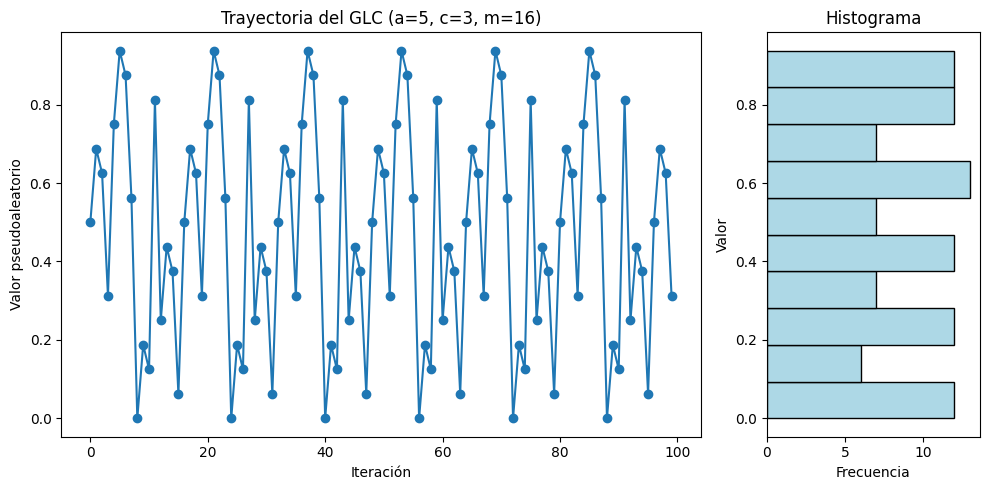

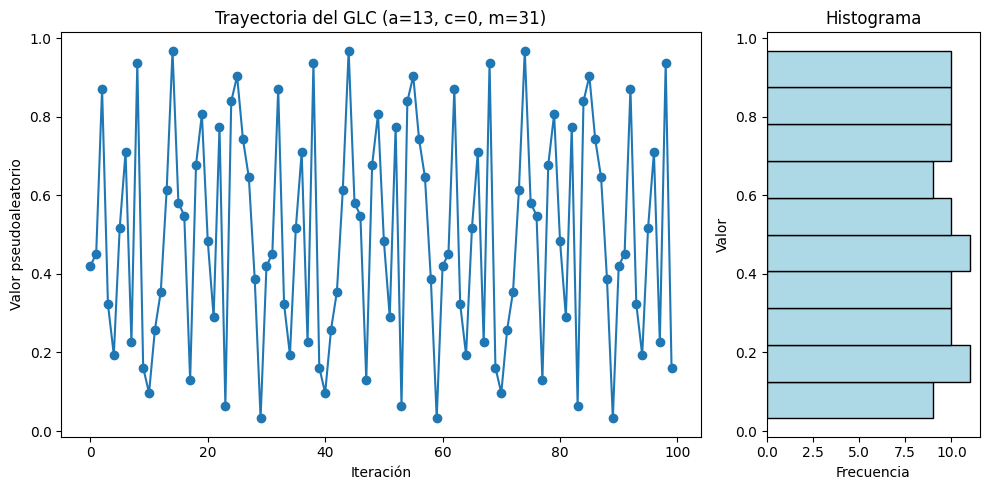

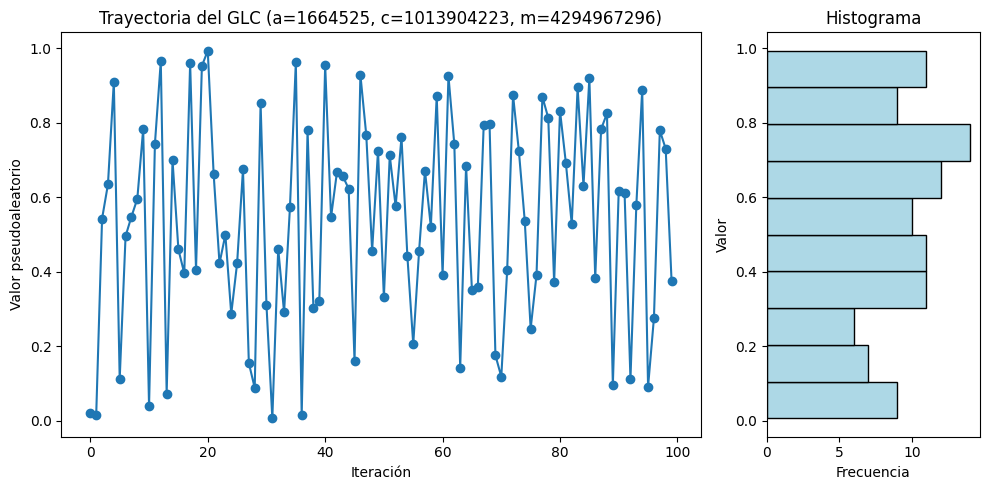

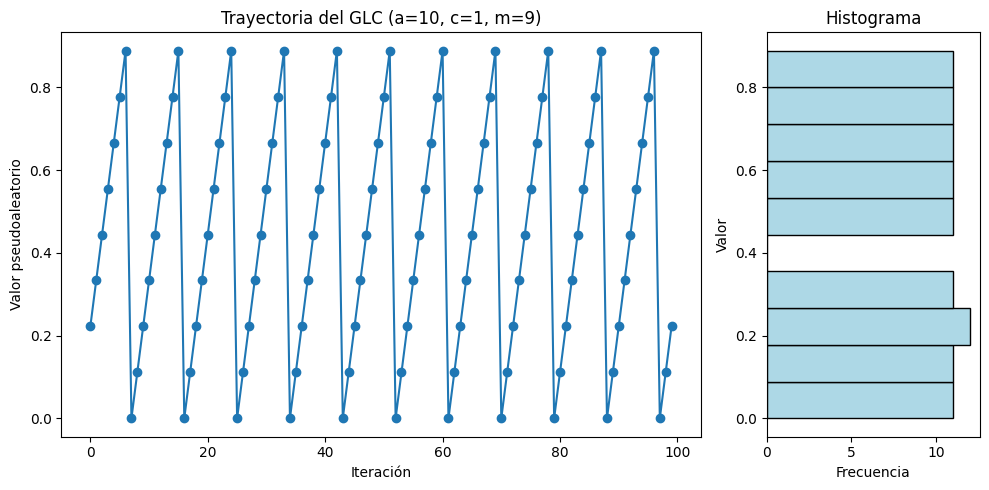

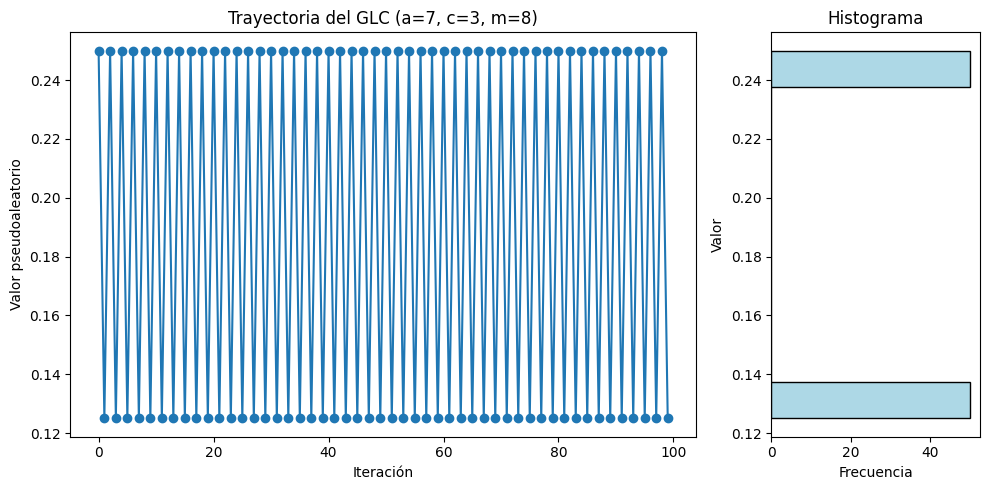

In [ ]:
# Grupos de parámetros para ilustrar ciclos
parametros_glc = [
    {'a': 5, 'c': 3, 'm': 16, 'X0': 1},       # Ciclo corto debido a m pequeño
    {'a': 13, 'c': 0, 'm': 31, 'X0': 1},      # Ciclo completo con c = 0
    {'a': 1664525, 'c': 1013904223, 'm': 2**32, 'X0': 12345},  # Ciclo largo con buen periodo
    {'a': 10, 'c': 1, 'm': 9, 'X0': 1},       # Ciclo corto por mala elección de parámetros
    {'a': 7, 'c': 3, 'm': 8, 'X0': 1}         # Ciclo completo con parámetros óptimos
]

# Generar gráficos para cada conjunto de parámetros
for i, params in enumerate(parametros_glc):
    glc = GeneradorLinealCongruencial(**params)

    # Generación de números pseudoaleatorios
    n = 100
    numeros_uniformes = glc.generar_numeros(n)

    # Crear gráfica de la trayectoria y el histograma horizontal
    fig = plt.figure(figsize=(10, 5))
    gs = GridSpec(1, 2, width_ratios=[3, 1])

    # Trayectoria del GLC
    ax0 = fig.add_subplot(gs[0])
    ax0.plot(range(n), numeros_uniformes, marker='o')
    ax0.set_title(f'Trayectoria del GLC (a={params["a"]}, c={params["c"]}, m={params["m"]})')
    ax0.set_xlabel('Iteración')
    ax0.set_ylabel('Valor pseudoaleatorio')

    # Histograma horizontal
    ax1 = fig.add_subplot(gs[1])
    ax1.hist(numeros_uniformes, bins=10, orientation='horizontal', color='lightblue', edgecolor='black')
    ax1.set_title('Histograma')
    ax1.set_xlabel('Frecuencia')
    ax1.set_ylabel('Valor')

    plt.tight_layout()
    plt.show()


### Preguntas:

1. **Comportamiento con \(m\) pequeño**: ¿Qué observas en la trayectoria y el histograma cuando se utilizan valores pequeños para el módulo \(m\)? ¿Cómo afecta esto el comportamiento del GLC?
2. **Comparación entre \(c = 0\) y \(c > 0\)**: Al comparar los conjuntos de parámetros del Grupo 2 (con \(c = 0\)) y el Grupo 5 (con \(c > 0\)), ¿qué diferencias observas en la longitud del ciclo y en la variabilidad de los números generados?
3. **Elección de parámetros adecuados**: ¿Por qué es importante elegir valores adecuados para \(a\), \(c\), y \(m\) al diseñar un GLC? ¿Qué implicaciones tiene en aplicaciones reales de simulación?
4. **Ciclos cortos y largos**: ¿Qué grupo de parámetros proporciona el ciclo más largo? ¿Cuál muestra el ciclo más corto? ¿Qué importancia tienen estos ciclos en la simulación estocástica y en la generación de números aleatorios?

# Método de la Transformada Inversa

El **Método de la Transformada Inversa** es una técnica que permite generar variables aleatorias con una distribución dada, partiendo de una secuencia de números pseudoaleatorios uniformemente distribuidos en el intervalo [0, 1]. Este método es muy útil cuando la función de distribución acumulada (CDF) de una distribución es invertible de manera explícita o numérica.

## Fundamento Teórico

Dado un número pseudoaleatorio uniforme $U \in [0, 1]$, generado por un generador de números uniformes, podemos obtener una variable aleatoria $X$ con una distribución acumulada $F_X(x)$ utilizando la siguiente relación:

$$
X = F_X^{-1}(U)
$$

Donde $F_X^{-1}$ es la función inversa de la CDF de la distribución deseada.

### Pasos del Método:
1. Generar un número pseudoaleatorio $U \sim \text{Uniforme}(0, 1)$.
2. Encontrar la inversa de la función de distribución acumulada (CDF) $F_X(x)$ de la variable aleatoria $X$.
3. Evaluar $X = F_X^{-1}(U)$ para obtener una realización de la variable aleatoria $X$.

### Ejemplos

#### Ejemplo 1: Distribución Exponencial
La distribución exponencial tiene la siguiente función de distribución acumulada (CDF):

$$
F_X(x) = 1 - e^{-\lambda x}, \quad x \geq 0
$$

Invirtiendo esta relación, obtenemos:

$$
F_X^{-1}(u) = -\frac{1}{\lambda} \ln(1 - u)
$$

Así, dado un número pseudoaleatorio $U \in [0, 1]$, podemos generar una variable $X$ que sigue una distribución exponencial con parámetro $\lambda$.

#### Ejemplo 2: Distribución de Cauchy
La distribución de Cauchy tiene la siguiente función de distribución acumulada:

$$
F_X(x) = \frac{1}{\pi} \arctan(x) + \frac{1}{2}
$$

La inversa de esta función es:

$$
F_X^{-1}(u) = \tan\left(\pi\left(u - \frac{1}{2}\right)\right)
$$

Con esto, podemos generar variables aleatorias con una distribución de Cauchy a partir de una secuencia de números uniformes.

---

## Implementación en Python Usando Datos de un GLC

A continuación, implementamos el método de la transformada inversa para generar datos de distribuciones exponenciales y de Cauchy utilizando números pseudoaleatorios uniformemente distribuidos, generados por un GLC.



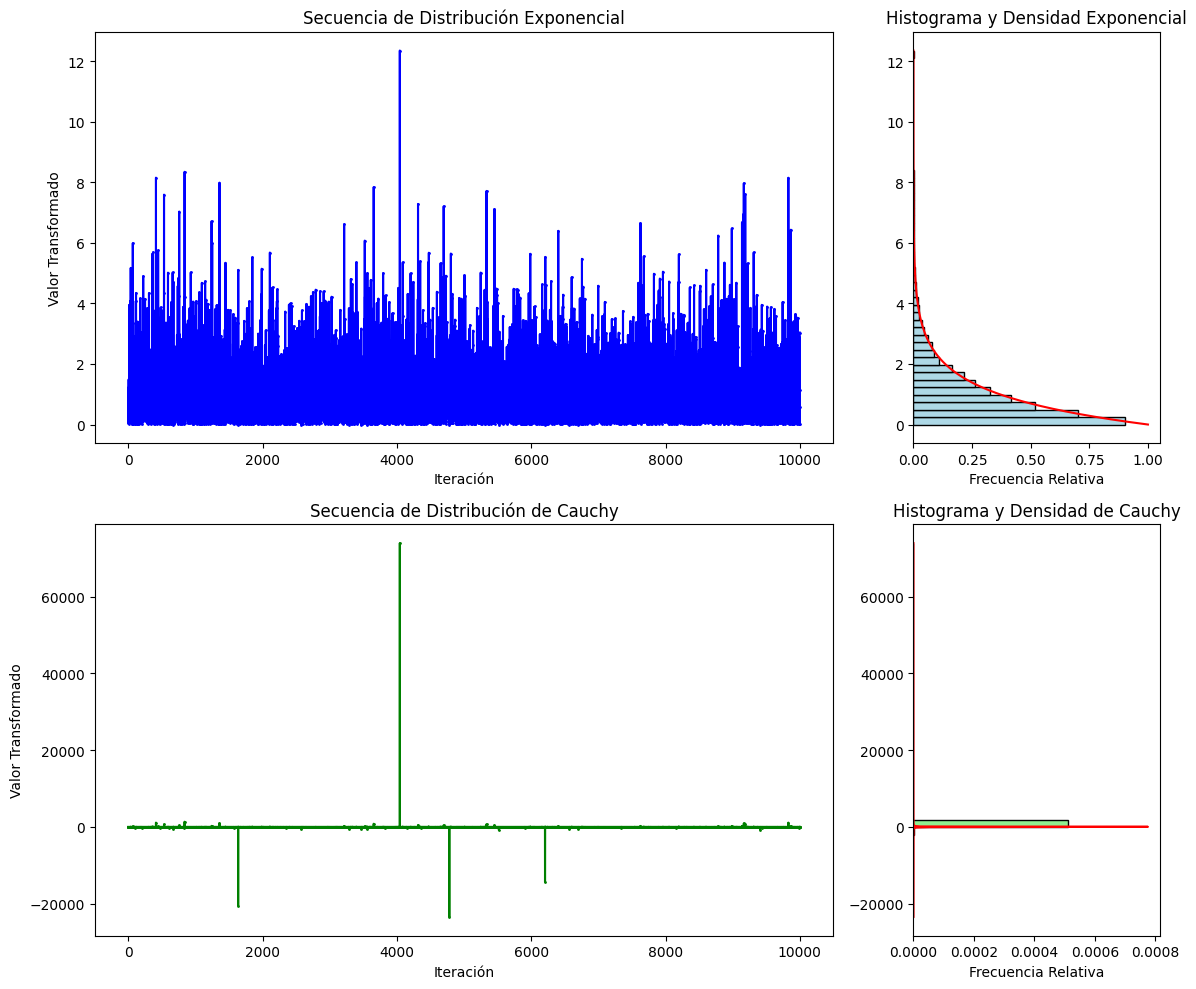

In [ ]:
# Parámetros para el GLC
glc = GeneradorLinealCongruencial(a=1664525, c=1013904223, m=2**32, X0=1)

# Generación de 10000 números uniformes
numeros_uniformes = glc.generar_numeros(10000)

# Transformada Inversa para una distribución Exponencial
def exponencial_inversa(u, lamb=1):
    return -np.log(1 - u) / lamb

# Transformada Inversa para una distribución de Cauchy
def cauchy_inversa(u):
    return np.tan(np.pi * (u - 0.5))

# Función de densidad para la distribución Exponencial
def densidad_exponencial(x, lamb=1):
    return lamb * np.exp(-lamb * x)

# Función de densidad para la distribución de Cauchy
def densidad_cauchy(x):
    return 1 / (np.pi * (1 + x**2))

# Aplicamos las transformaciones
exponenciales = exponencial_inversa(numeros_uniformes, lamb=1.0)
cauchys = cauchy_inversa(numeros_uniformes)

# Creamos la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'width_ratios': [3, 1]})

# Gráfica de la secuencia transformada (Exponencial) y su histograma horizontal
axs[0, 0].plot(range(len(exponenciales)), exponenciales, marker='o', markersize=1, color='blue')
axs[0, 0].set_title("Secuencia de Distribución Exponencial")
axs[0, 0].set_xlabel("Iteración")
axs[0, 0].set_ylabel("Valor Transformado")

# Histograma horizontal para Exponencial
axs[0, 1].hist(exponenciales, bins=50, density=True, orientation='horizontal', color='lightblue', edgecolor='black')
x_vals = np.linspace(0, max(exponenciales), 1000)
axs[0, 1].plot(densidad_exponencial(x_vals), x_vals, color='red', label='Densidad Exponencial')
axs[0, 1].set_title("Histograma y Densidad Exponencial")
axs[0, 1].set_xlabel("Frecuencia Relativa")

# Gráfica de la secuencia transformada (Cauchy) y su histograma horizontal
axs[1, 0].plot(range(len(cauchys)), cauchys, marker='o', markersize=1, color='green')
axs[1, 0].set_title("Secuencia de Distribución de Cauchy")
axs[1, 0].set_xlabel("Iteración")
axs[1, 0].set_ylabel("Valor Transformado")

# Histograma horizontal para Cauchy
axs[1, 1].hist(cauchys, bins=50, density=True, orientation='horizontal', color='lightgreen', edgecolor='black')
x_vals_cauchy = np.linspace(min(cauchys), max(cauchys), 1000)
axs[1, 1].plot(densidad_cauchy(x_vals_cauchy), x_vals_cauchy, color='red', label='Densidad Cauchy')
axs[1, 1].set_title("Histograma y Densidad de Cauchy")
axs[1, 1].set_xlabel("Frecuencia Relativa")

plt.tight_layout()
plt.show()


### Preguntas:

1. **Relación con la Función Inversa**:
   - ¿Cómo se relaciona la función inversa de la distribución de Cauchy, que es la tangente ($\tan(\pi(u - 0.5))$), con la inexistencia de esperanza y varianza en esta distribución?
   
2. **Comportamiento de la Tangente**:
   - Dado que la función tangente presenta asíntotas verticales, ¿cómo afecta esto a la generación de valores extremos en la distribución de Cauchy? ¿Cómo influye este comportamiento en la forma de su densidad?
   
3. **Comparación con Otras Distribuciones**:
   - A diferencia de otras distribuciones como la normal o la exponencial, la distribución de Cauchy no tiene esperanza ni varianza definida. ¿De qué manera la función inversa tangente refleja este comportamiento? ¿Qué implicaciones tiene esto para la simulación de datos?


### Pregunta: Distribución de Pareto

Implementa el método de la **transformada inversa** para la **distribución de Pareto**. Su función de distribución acumulada es:

$$ F_X(x) = 1 - \left(\frac{x_m}{x}\right)^\alpha $$

La función inversa es:

$$ F_X^{-1}(u) = \frac{x_m}{(1 - u)^{1/\alpha}} $$

Genera números aleatorios con esta distribución utilizando el GLC. Compara la distribución de los datos generados con la **densidad de Pareto**:

$$ f_X(x) = \frac{\alpha x_m^\alpha}{x^{\alpha + 1}} $$

Gráfica la trayectoria de los números generados y el histograma con la densidad teórica superpuesta.
